# n-widths for transport problems 
## steepness

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd, orth, qr
from scipy.optimize import curve_fit
cmap = plt.cm.plasma

In [2]:
from initial_conditions import Domain, Heaviside, LinearRamp, SmoothRamp, Sigmoid, CkRamp
from basis_functions import SVD, Trigonometric, Greedy, LNA, LPF

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
page_width_pt = 455.24
pt2in = 0.01389 
pt2cm = 0.0352777778
cm2in = 1/2.54
plot_width_in = page_width_pt*pt2in/2
print(plot_width_in/cm2in)

fs = 10
fs_lbl = 6
plt.rcParams["figure.figsize"] = (plot_width_in, plot_width_in/1.61803398875)
plt.rcParams["figure.autolayout"] = True
plt.rcParams['font.size'] = fs
plt.rcParams['axes.titlesize'] = fs
plt.rcParams['axes.labelsize'] = fs
plt.rcParams['xtick.labelsize'] = fs
plt.rcParams['ytick.labelsize'] = fs
plt.rcParams['legend.labelspacing'] = 0.0
plt.rcParams['legend.fontsize'] = fs_lbl
plt.rcParams['legend.handlelength'] = 1.0

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
mpl.rc('text', usetex=True)
mpl.rc('font', family='serif', size=12, serif='Computer Modern Roman')
pth = "../Plots/"

8.030570172000001


In [4]:
m, n, r = 2000, 2000, 1000
x = Domain([0, 1], m)
mu = Domain([0, 1], n)

epsilons = [0.5, 0.2, .1, 0.05, 0.02, .01]

# linear ramp

In [5]:
all_SVDs_0 = {}
delta_Ns = {}
d_Ns = {}
u_ks = {}
for i, epsilon in enumerate(epsilons):
    lbl = r'$\epsilon={:.2f}$'.format(epsilon)
    print(i, lbl)
    u_k = CkRamp(epsilon, 0)
    u_ks[lbl] = u_k
    X = u_k.get_snapshots(x(), mu())
    all_SVDs_0[lbl] = my_svd = SVD(X)
    delta_n, S = my_svd.calc_error_analytic(X)
    delta_Ns[lbl] = delta_n
    
    #delta_n, d_N = my_svd.calc_error(X)
    #delta_Ns[lbl] = delta_n
    #d_Ns[lbl] = d_N

0 $\epsilon=0.50$
get_snapshots
1 $\epsilon=0.20$
get_snapshots
2 $\epsilon=0.10$
get_snapshots
3 $\epsilon=0.05$
get_snapshots
4 $\epsilon=0.02$
get_snapshots
5 $\epsilon=0.01$
get_snapshots


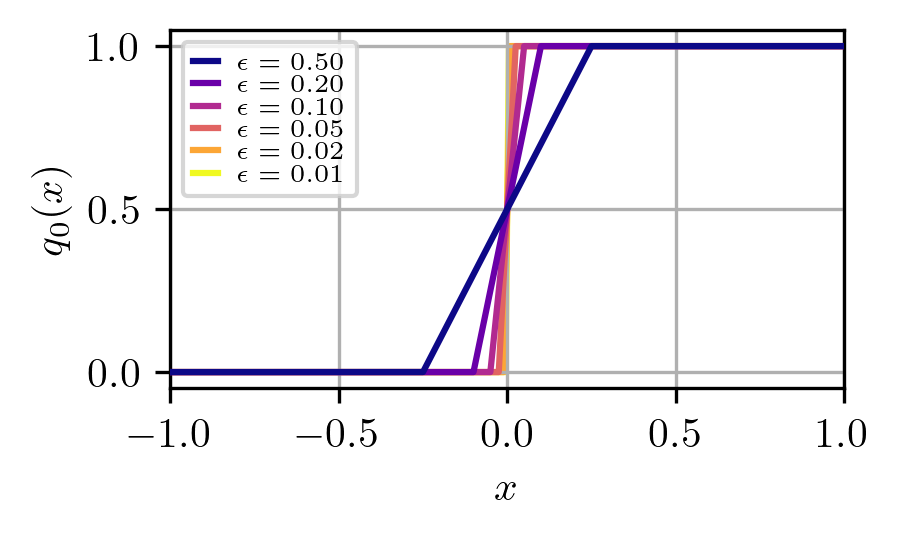

In [10]:
fig, ax = plt.subplots()
for i, epsilon in enumerate(epsilons):
    lbl = lbl = r'$\epsilon={:.2f}$'.format(epsilon)
    u_k = u_ks[lbl]
    color = cmap(i/5)
    u_k.plot(x(), ax=ax, ms=1, label=lbl, color=color, HWO=False, zorder=5-i)
plt.xlim(-1, 1)
plt.ylabel("$q_0(x)$")
plt.legend()
plt.tight_layout()
plt.grid()
fig.savefig(pth+"steepness_f.pdf")
plt.show()

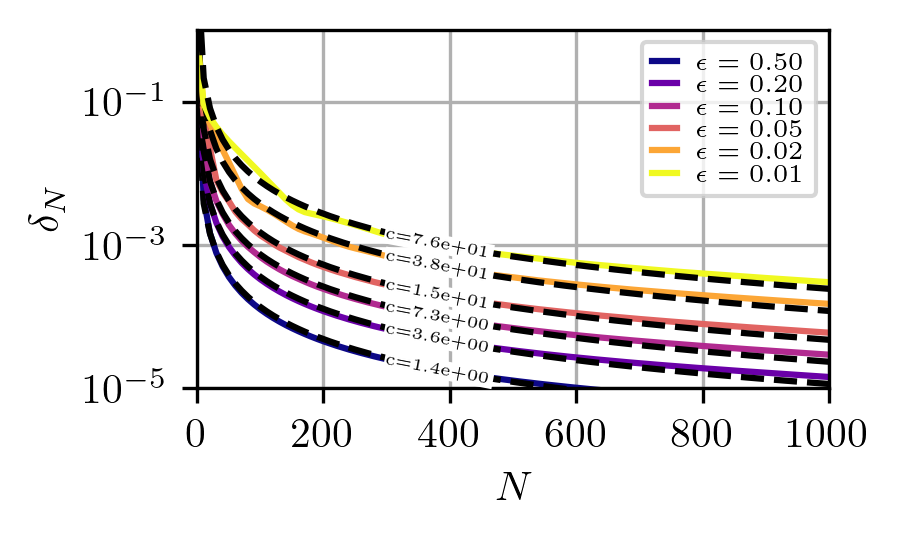

In [7]:
p = 10

fig, ax1 = plt.subplots()

#for key, my_svd in all_SVDs_0.items():
for i, epsilon in enumerate(epsilons):
    lbl = lbl = r'$\epsilon={:.2f}$'.format(epsilon)

    color = cmap(i/5)
    #d_N = d_Ns[lbl]
    delta_N = delta_Ns[lbl]
    N = np.arange(1, len(delta_N)+1)
    r_computed = delta_N != 0
    #ax1.plot(N[r_computed], d_N[r_computed], "k--", ms=1)
    ax1.plot(N[::p], delta_N[::p], "-", ms=1, label=lbl, color=color)

    
    k = 0
    model = 1/np.pi**(k+2) * N**(-(2*k+3)/2)
    C = delta_N/model
    C_estimated = np.mean(C[100: r//3*2])
    
    ax1.plot(N[::p], model[::p]*C_estimated, "k--")
    ltex = ax1.text(r//3+50, model[r//3+50]*C_estimated, "c={:.1e}".format(C_estimated), size=4, color="k",
                    rotation=-17*2/np.pi, ha="center", va="center", bbox=dict(ec='1',fc='1', pad=0))
plt.xlabel(r'$N$')
plt.ylabel(r'$\delta_N$')
ax1.set_yscale('log')
ax1.set_xlim([0, r])
ax1.set_ylim([1e-5, 1])
ax1.grid(which="both")
plt.legend()
plt.tight_layout()
fig.savefig(pth+"steepness_e.pdf")
plt.show()

In [8]:
asd

NameError: name 'asd' is not defined

# smooth ramp

In [ ]:
all_SVDs_1 = {}
for epsilon in epsilons:
    u_C1 = CkRamp(epsilon, 5)
    u_k.plot(x())
    X = u_k.half_wave_odd(x(), mu())
    all_SVDs_1["eps %.3f" % epsilon] = SVD(X)

In [ ]:
fig, ax1 = plt.subplots()

for key, val in all_SVDs_1.items():
    S = val.S
    print(key)
    ax1.plot(np.arange(1, len(S)+1), S/S[0], marker=".", ms=1, label=key)
ax1.set_xlabel("order")
ax1.set_ylabel("singular value")
ax1.set_yscale('log')
ax1.set_xlim([0, r])
ax1.set_ylim([1e-8, 1])
ax1.grid(which="both")
plt.legend(prop={'size': 8})
plt.tight_layout()    